## Twitter Bot detection part 2

### Summary from part 1






Bots, trolls and fake accounts are quite problematic in this era of social media-dependent consciouness. They take part in creating hypes and spams, spread fake news, ultimately displaying non-genuine behavior in micro-blogging platforms. Genuine posts are valuable not only because that help us understand the human sentiments, but also becuase that increase diversity in the sphere.   

### Goal 
The goal of this project is to create a classifier that predicts if an account is a troll or a human. Using APIs, NLP and Machine Learning, I predict important features from which we detect a troll account and avoid spending time communicating with trolls. 

The outcome from this project could be used for marketers who target real users for selling their products. A curated list of real users will help them reach out to customers easily and attain business goals. 


### Data

The data comprises existing data from Kaggle [], data collected via Tweepy API from twitter between dates x/x/18 - x/x/18. 

### Project Workflow

#### Approach 1: 
We tried to build a classifier from existing user account data to predict bots. The model(s) achieved high accuracy, implicating model overfitting. Upon inspection of the datasets, we found we have small training and testing datasets with high sampling bias. Therefore, we needed to gather more data. 

#### Approach 2:
We gathered more data from Twitter. However, we found difficilty in getting  data that could be distinctively labeled for bots and non-bots. Precisely, many Twitter verified accounts that are claimed to be authentic have many bots or they are representative of an organization. The bot data that we gathered [from Website](www.) are small in number (xxx) and are suspended Russian bots. This makes the sample biased.  

#### Approach 3:
Becuse of this we decided to do a sentiment analysis on #TOPIC and identify bots from the tweets. 


### Analysis

Predicting bots from text is an NLP (Natural Languae Processing) problem.
I leveraged NLTK as my tokenizer and Sklearn tfidfVectorizer to perform my Bag of words Analysis and tfidf transformation. Word2Vec

For the final model I evaluated model complexity by accuarcy and speed. I eventually settled on _____
- Why? and limiting the max features in the SVD step to explain a lot of  __________________

-.

-.

-.


### Conclusions
- .

-.

-.

-.



## Approach 1: Bot detection from user account data 

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.utils import resample

# Import sklearn models 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, confusion_matrix, accuracy_score

#nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Time 
import time as t

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### to do next - 

 - try creating the histograms for each of the plots above to show how much overlap and the overall distribution of each class. 
- use the log features for the inputs, probably not required for RFC, 
- try all the classifiers with the log features and ses if that imporives the accuracy/metrics of the other classifiers. 
- bring more data - https://botometer.iuni.iu.edu/bot-repository/datasets.html
- try more feature engineering - log, and get some more features may be from the paper
- try gettin more tweets from the bots and the real users - try sentitment analysis - give each person a score overall on how positive and negative feature. 

- write up what you did so far - this is the baseline - 
- 100 % accuracy > more data > how the data is biased > use the cluster plots to show how they are biased - 
- now bring in some fresh data from the other reposi https://botometer.iuni.iu.edu/bot-repository/datasets.html
- feature engineering and see how incorporate NLP and how sentiment analysis to score [positivity/negativity ] for the last 10 tweets. 
- 

## Summary of baseline 

To train our system we initially used a publicly available dataset consisting of 7k bot and non-bot accounts in total. Later we collected data; employed Twitter scraping and incorporated data from various publicly available resources. This procedure yielded a dataset of 57.4k with 39k nonbot and 18k bot accounts. 

We benchmarked our system using several off-the-shelf algorithms provided in the scikit-learn library (Pedregosa et. al. 2011). We measured the models' accuracy by measuring the Area Under the Receiver Operating Curve (ROC-AUC) with 5-fold cross validation. We compared Bernoulli Naive Bayes, Logistic Regression, Gradient Boosting Classifier, K-nearest neighbors, Random Forest Classifier and Support Vector Classifier. The best classification performance of 98.76 was obtained by the Random Forest Algorithm. The Random Forest model was trained with 100 estimators and the GIni coefficient to measure the quality of splits.

For the rest of the project I am going to focus on the latest verified dataset from [this resource](https://botometer.iuni.iu.edu/bot-repository/datasets.html) as the data we collected had sampling bias. Another advantage of choosing the following dataset is that we can access the tweets provided with these datasets. 

In the following I take a subset of certified bot and non-bot accounts, create features and try to improve the model accuracy. This dataset has almost 39k datapoints with 36% certified bots. 

In [3]:
# Getting more data 
all_hums = pd.read_csv('Data/all_hums.csv', encoding='utf-8')
all_bots = pd.read_csv('Data/all_bots.csv', encoding='utf-8')
new_fake = pd.read_csv('Data/fake_users_.csv')
fake_users_2 = pd.read_csv('Data/fake_users_2.csv')


In [4]:
# Creating certified humans and non-human dataset 
cert_hum = all_hums
cert_fake = pd.concat([all_bots, fake_users_2, new_fake], axis=0, ignore_index=True)

In [5]:
cert_hum.shape, cert_fake.shape

((24700, 20), (14245, 20))

In [12]:
# This dataset consists of all certified humans and bots accounts, and their meta-data

df_cert = pd.concat([cert_hum, cert_fake], axis=0, ignore_index=True)

df_cert.shape

(38945, 20)

In [13]:
# Checking for duplicates 
df_cert = df_cert.drop_duplicates(subset='id')
df_cert.shape

(35588, 20)

In [14]:
df_cert.bot.value_counts()

0    24697
1    10891
Name: bot, dtype: int64

### Features 

__Existing features__: So far we have trained our models on the numerical features. And the most imporeant features are 'statuses_count' and 'favourites_count', followed by 'followers_count' and 'friends_count'. In the following I create new features, based on the meta-data provided with the user accounts. However, the main difficulty in creating these features is that a large percentage of the values are missing in these features. 

__New features from meta-data__:

- Length of screen names 
- Length of description 
- calculate the ratio of (# of friends/2 * # of followers). It has been claimed that spambots have a high ratio value (i.e., lower ratio values mean legitimate users). [here](https://arxiv.org/pdf/1509.04098.pdf)

__New features from tweets__:

- Sentiment and subjectivity features 

- The content of spambots’ tweets exhibits the so-called message similarity. The score is higher for bots. (Not implemented)

In [15]:
# There are several null values or blanks 
print(df_cert.screen_name.isna().sum(),
df_cert.description.isna().sum())

#Filling blanks with 0 

df_cert.screen_name = df_cert.screen_name.fillna(0)
df_cert.description = df_cert.description.fillna(0)

19273 24532


In [16]:
# Features from meta-data

# Length of screen name 
df_cert.screen_name = df_cert.screen_name.astype('str')
df_cert['len_screen_name'] = df_cert.screen_name.apply(lambda x: len(x))

In [17]:
# all null values are converted to 1 . # 19k 1 length 

df_cert.len_screen_name.value_counts()

1     19273
12     2627
15     2303
13     2250
14     2098
11     2098
10     1673
9      1364
8       914
7       611
6       279
5        88
4         8
3         2
Name: len_screen_name, dtype: int64

In [18]:
# Length of description a
df_cert.description = df_cert.description.astype('str')  # null values will be converted to 1 in the next step
df_cert['len_desc'] = df_cert.description.apply(lambda x: len(x))

In [19]:
#df_cert.len_desc.value_counts()

In [20]:
df_cert['ratio_fr_2xfl'] = df_cert.friends_count /(2* df_cert.followers_count)

In [21]:
df_cert.head()

,bot,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,has_extended_profile,id,...,location,name,screen_name,status,statuses_count,url,verified,len_screen_name,len_desc,ratio_fr_2xfl
0,0,Mon Nov 27 06:55:12 +0000 2006,NaN,NaN,Partner at Balderton Capital (formerly Benchma...,267.0,5055,1466,NaN,24503,...,Between Europe and the US,Roberto Bonanzinga,Bonanzinga,NaN,4340.0,http://t.co/32VHs0bxbY,NaN,10,56,0.145005
1,0,Sun Nov 26 15:19:32 +0000 2006,NaN,NaN,L'uomo ha creato dio a sua immagine e somiglia...,12.0,132,194,NaN,22903,...,"Napoli, Italy",effeffe,effeffe,NaN,164.0,http://t.co/CX7EHdk9DJ,NaN,7,159,0.734848
2,0,Sun Dec 31 02:03:17 +0000 2006,NaN,NaN,Research Director at ISI Foundation. Data scie...,871.0,1154,832,NaN,382393,...,"Torino, Piedmont",Ciro Cattuto,ciro,NaN,1070.0,http://t.co/26dNjSYe5Q,NaN,4,121,0.360485
3,0,Wed Dec 27 14:55:17 +0000 2006,NaN,NaN,Web and social media developer from Italy,478.0,930,535,NaN,286543,...,"Milan, Italy",Alessio Bragadini,abragad,NaN,6892.0,http://t.co/xoOdZi9jic,NaN,7,41,0.287634
4,0,Tue Jan 02 09:01:50 +0000 2007,NaN,NaN,0,41.0,173,444,NaN,438023,...,Bologna,fullcaffeine,fullcaffeine,NaN,2885.0,http://www.fullcaffeine.com,NaN,12,1,1.283237


In [116]:
#len(set(df_cert.screen_name))

In [22]:
#df_cert[df_cert.id == 1124249136]
df_cert.columns

Index(['bot', 'created_at', 'default_profile', 'default_profile_image',
       'description', 'favourites_count', 'followers_count', 'friends_count',
       'has_extended_profile', 'id', 'id_str', 'lang', 'listed_count',
       'location', 'name', 'screen_name', 'status', 'statuses_count', 'url',
       'verified', 'len_screen_name', 'len_desc', 'ratio_fr_2xfl'],
      dtype='object')

In [23]:
col_to_keep = ['followers_count', 'friends_count', 'favourites_count',
       'statuses_count', 'len_screen_name', 'len_desc', 'ratio_fr_2xfl']

In [24]:
X = df_cert[col_to_keep]
X.columns

Index(['followers_count', 'friends_count', 'favourites_count',
       'statuses_count', 'len_screen_name', 'len_desc', 'ratio_fr_2xfl'],
      dtype='object')

In [25]:
X = X.fillna(0)
X = X.applymap(lambda x: x if x != np.inf else -1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, df_cert.bot, test_size= .3)

In [27]:
def baseline_models(clf, X_train, y_train, X_val, y_val):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = t.time()
    clf.fit(X_train, y_train)
    train_time = t.time() - t0
    print("train time: %0.3fs" % train_time)

    print("Crossvalidating: ")
    t0 = t.time()
    cv_score = cross_val_score(clf, X_train, y_train, cv=5)
    train_time = t.time() - t0
    print("Crossvalidated accuracy: %0.3f with std %0.3f" % (cv_score.mean(), cv_score.std()))
    
    #Metrics
    t0 = t.time()
    pred = clf.predict(X_val)
    test_time = t.time() - t0
    print("test time:  %0.3fs" % test_time)
    
    #score = accuracy_score(y_test, pred)
    #print("accuracy:   %0.3f" % score)
    

    print('confusion matrix \n', confusion_matrix(y_val, pred))  
    precision = precision_score(y_val, pred)
    print('Test precision score %.3f ' % precision)
    recall = recall_score(y_val, pred)
    print('Test recall score %.3f ' % recall)
    rocauc = roc_auc_score(y_val, pred)
    print('ROC AUC score %.3f' % rocauc)

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, cv_score.mean(), train_time, test_time, precision, recall, rocauc


results = []

bnb = BernoulliNB()
logReg = LogisticRegression()
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier(n_neighbors=10)
rfc = RandomForestClassifier(n_estimators=100)
svc = SVC()

for clf, name in (
        (bnb, "BNB Classifier"),
        (logReg, "LogReg"),
        (gbc, "GBC"),
        (knn, "kNN"),
        (rfc, "Random forest"),
        (svc, "SVC")
):
    print('=' * 80)
    print(name)
    results.append(baseline_models(clf, X_train, y_train, X_test, y_test))



BNB Classifier
________________________________________________________________________________
Training: 
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
train time: 0.021s
Crossvalidating: 
Crossvalidated accuracy: 0.958 with std 0.003
test time:  0.004s
confusion matrix 
 [[7290   86]
 [ 381 2920]]
Test precision score 0.971 
Test recall score 0.885 
ROC AUC score 0.936

LogReg
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
train time: 0.508s
Crossvalidating: 
Crossvalidated accuracy: 0.939 with std 0.004
test time:  0.001s
confusion matrix 
 [[6939  437]
 [ 254 3047]]
Test precision score 0.875 
Test recall score 0.923 
ROC AUC score 0.932

GBC
___________

In [28]:

display_scores = pd.DataFrame(columns=['Classifier', 'Mean CV accuracy', 'Precision score', 'Recall score', 'ROC-AUC score'])

row_index = 0
for clf in results:
    display_scores.loc[row_index, 'Classifier'] = clf[0]
    display_scores.loc[row_index, 'Mean CV accuracy'] = clf[1]
    display_scores.loc[row_index, 'Precision score'] = clf[4]
    display_scores.loc[row_index, 'Recall score'] = clf[5]
    display_scores.loc[row_index, 'ROC-AUC score'] = clf[6]
    row_index +=1
display_scores

,Classifier,Mean CV accuracy,Precision score,Recall score,ROC-AUC score
0,BernoulliNB,0.957649,0.971391,0.88458,0.93646
1,LogisticRegression,0.938702,0.874569,0.923054,0.931904
2,GradientBoostingClassifier,0.983301,0.971394,0.97728,0.9822
3,KNeighborsClassifier,0.963791,0.944789,0.922751,0.949309
4,RandomForestClassifier,0.988399,0.98507,0.9794,0.986379
5,SVC,0.79764,0.99633,0.328991,0.664224


    Classifier	Mean CV accuracy	Precision score	Recall score	ROC-AUC score
        1. BernoulliNB	0.883124	0.934934	0.7821	0.878373
    2.	LogisticRegression	0.670871	0.489813	0.878174	0.726035
    3.	GradientBoostingClassifier	0.95639	0.941787	0.927854	0.950569
    4.	KNeighborsClassifier	0.933453	0.916793	0.88347	0.923059
    5.	RandomForestClassifier	0.980397	0.982381	0.967489	0.979703
    6.	SVC	0.887504	0.99349	0.696804	0.847338

In [33]:
[print(l,f) for l,f in zip(X_train.columns, rfc.feature_importances_)]

followers_count 0.06591565437557992
friends_count 0.045825340868702845
favourites_count 0.17824335146933515
statuses_count 0.29826097290222214
len_screen_name 0.23357381879344957
len_desc 0.049842434933246596
ratio_fr_2xfl 0.12833842665746384


[None, None, None, None, None, None, None]

## Interim findings before incorporating NLP features. 

Random forest performs very well (CV accuracy 98.8%, ROC-AUC score .986 with 98.82% and 97.9% Precision and Recall scores). This is comparatively great improvement given that our metrics for the baseline Random Forest model were: 
 - Cross-validated accuracy 98.03%
 - ROC-AUC score 0.979
 - Precision: 98.23%, Recall: 96.74%	
 
The most important features are: 'statuses_count', length of the screen name, 'favourites_count', and the ratio of the friends count and 2 times followers count. 

In the following, I am want to see how the clusters of distinguishing features wrt the bot and real users. 

In [34]:

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs


In [35]:
X_train.columns

Index(['followers_count', 'friends_count', 'favourites_count',
       'statuses_count', 'len_screen_name', 'len_desc', 'ratio_fr_2xfl'],
      dtype='object')

In [36]:
cluster_cols = ['len_screen_name', 'len_desc', 'ratio_fr_2xfl', ]

In [71]:
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using

bandwidth = estimate_bandwidth(X_train[cluster_cols], quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
X_train[cluster_cols] 

ms.fit(X_train[cluster_cols])
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)



number of estimated clusters : 20


In [84]:
labels

array([0, 0, 0, ..., 0, 0, 0])

IndexError: index 3 is out of bounds for axis 0 with size 3

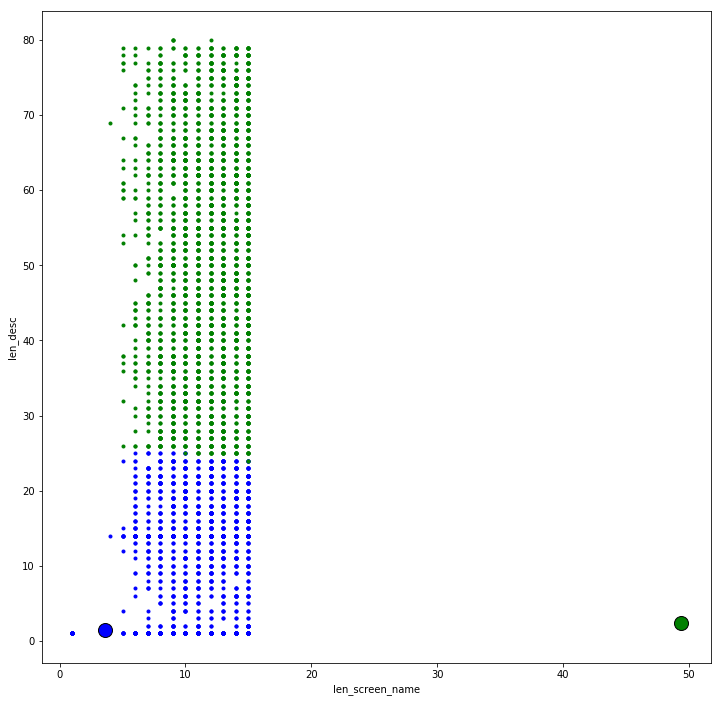

In [86]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(figsize=(12,12))
#plt.clf()

feature1 = 0
feature2 = 1
feature3 = 2

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    
    plt.plot(cluster_center[k], cluster_center[k+1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    plt.plot(X_train[cluster_cols].values[my_members, feature1], X_train[cluster_cols].values[my_members, feature2], col + '.')
    plt.xlabel(cluster_cols[feature1])
    plt.ylabel(cluster_cols[feature2])
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [98]:
cluster_cols[0]

'len_screen_name'

Text(0.5,1,'Distribution of the length of the screen names of bots and real accounts')

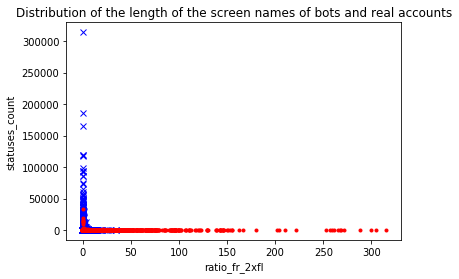

In [108]:

plt.plot(X_train[X_train.bot==False][cluster_cols[2]].values, X_train[X_train.bot==False]['favourites_count'].values, 'bx')
plt.plot(X_train[X_train.bot==True][cluster_cols[2]].values, X_train[X_train.bot==True]['favourites_count'].values,  'r.')
plt.xlabel(cluster_cols[2])
plt.ylabel('statuses_count')
plt.title('Distribution of the length of the screen names of bots and real accounts')

In [46]:
X_train['bot'] = y_train

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
cluster_cols

['len_screen_name', 'len_desc', 'ratio_fr_2xfl']

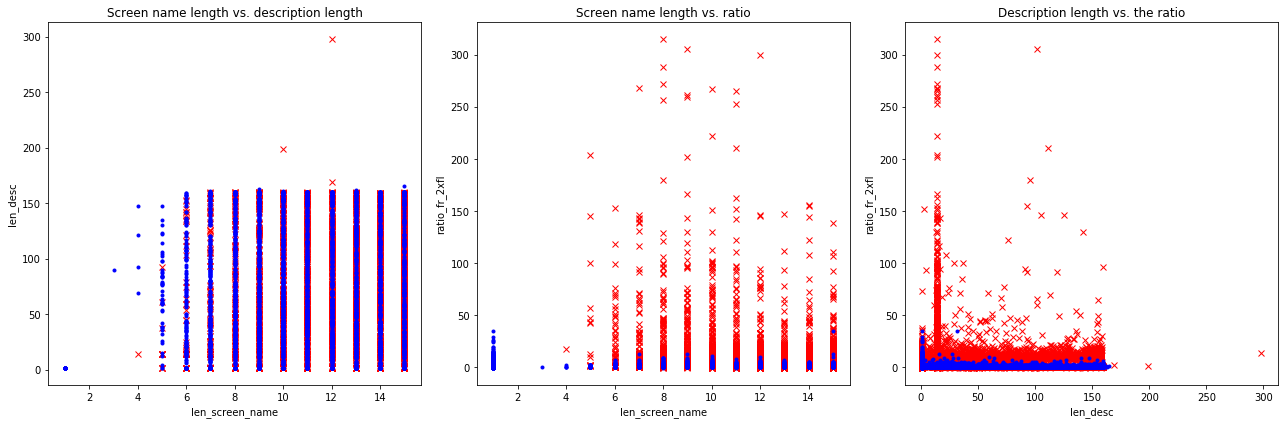

In [133]:
plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
plt.plot(X_train[X_train.bot==True][cluster_cols[0]].values, X_train[X_train.bot==True][cluster_cols[1]].values,  'rx')
plt.plot(X_train[X_train.bot==False][cluster_cols[0]].values, X_train[X_train.bot==False][cluster_cols[1]].values, 'b.')
plt.xlabel(cluster_cols[0])
plt.ylabel(cluster_cols[1])
plt.title('Screen name length vs. description length')

plt.subplot(1,3,2)
plt.plot(X_train[X_train.bot==True][cluster_cols[0]].values, X_train[X_train.bot==True][cluster_cols[2]].values,  'rx')
plt.plot(X_train[X_train.bot==False][cluster_cols[0]].values, X_train[X_train.bot==False][cluster_cols[2]].values, 'b.')
plt.xlabel(cluster_cols[0])
plt.ylabel(cluster_cols[2])
plt.title('Screen name length vs. ratio')


plt.subplot(1,3,3)
plt.plot(X_train[X_train.bot==True][cluster_cols[1]].values, X_train[X_train.bot==True][cluster_cols[2]].values,  'rx')
plt.plot(X_train[X_train.bot==False][cluster_cols[1]].values, X_train[X_train.bot==False][cluster_cols[2]].values, 'b.')
plt.xlabel(cluster_cols[1])
plt.ylabel(cluster_cols[2])
plt.title('Description length vs. the ratio')
plt.tight_layout()
plt.show()

In [134]:
# Converting the values to log scale 
X_train_log = pd.DataFrame(columns=cluster_cols)

# 0 values are converted to inf in log scale, so changing them to -1
X_train_log = X_train[cluster_cols].applymap(lambda x: np.log10(x) if x >= 1 else -1)

In [135]:
X_train_log['bot'] = y_train

In [136]:
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using


bandwidth = estimate_bandwidth(X_train_log[cluster_cols], quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
X_train_log[cluster_cols] 

ms.fit(X_train_log[cluster_cols])
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)



number of estimated clusters : 6


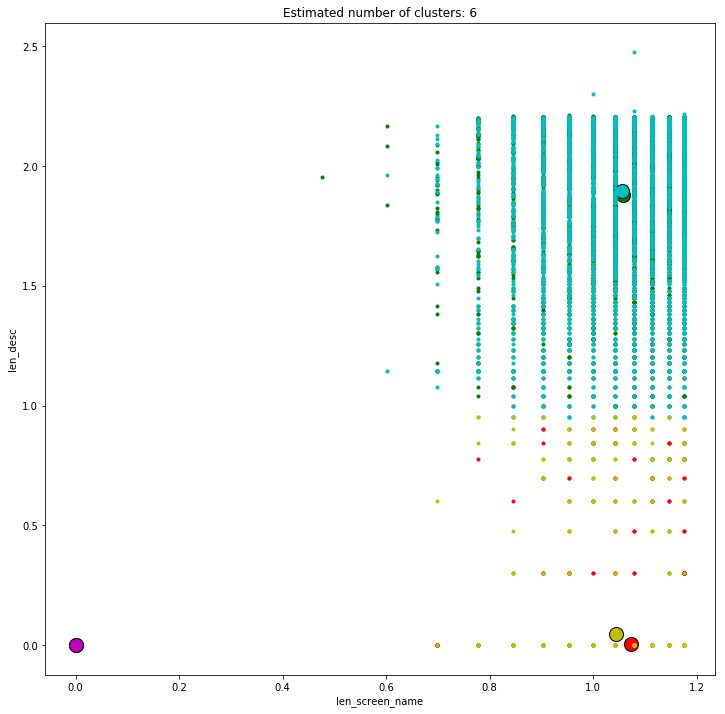

In [137]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(figsize=(12,12))
plt.clf()

feature1 = 0
feature2 = 1
feature3 = 2
feature4 = 3
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    plt.plot(X_train_log[cluster_cols].values[my_members, feature1], X_train_log[cluster_cols].values[my_members, feature2], col + '.')
    plt.xlabel(cluster_cols[feature1])
    plt.ylabel(cluster_cols[feature2])
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [138]:
# creating index for passing on to the plots to show the following plots for each feature. 

members_bot_ind = y_train[y_train == True].index.values # index to array 
members_nonbot_ind = y_train[y_train == False].index.values

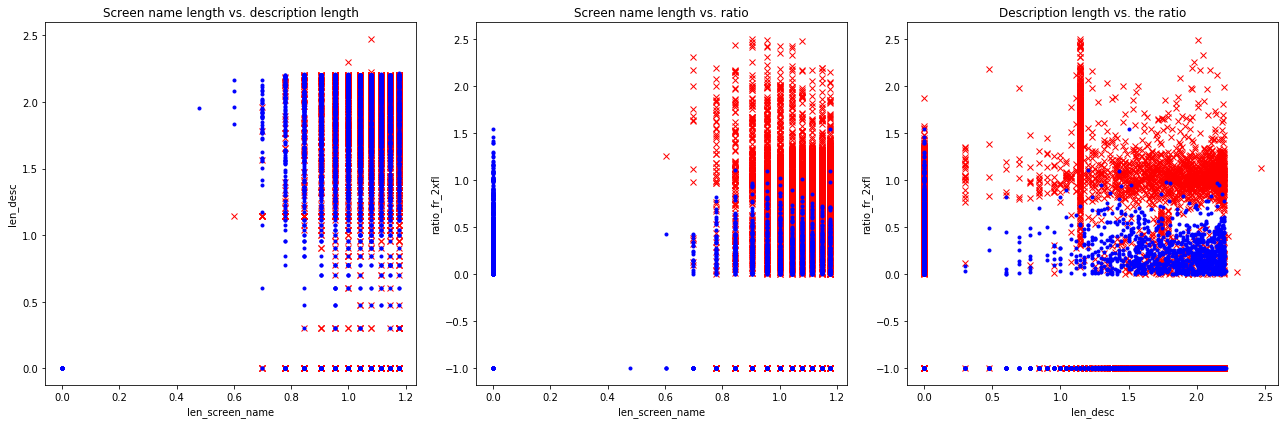

In [147]:
plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
plt.plot(X_train_log[X_train_log.bot==True][cluster_cols[0]].values, X_train_log[X_train_log.bot==True][cluster_cols[1]].values,  'rx')
plt.plot(X_train_log[X_train_log.bot==False][cluster_cols[0]].values, X_train_log[X_train_log.bot==False][cluster_cols[1]].values, 'b.')
plt.xlabel(cluster_cols[0])
plt.ylabel(cluster_cols[1])
plt.title('Screen name length vs. description length')

plt.subplot(1,3,2)
plt.plot(X_train_log[X_train_log.bot==True][cluster_cols[0]].values, X_train_log[X_train_log.bot==True][cluster_cols[2]].values,  'rx')
plt.plot(X_train_log[X_train_log.bot==False][cluster_cols[0]].values, X_train_log[X_train_log.bot==False][cluster_cols[2]].values, 'b.')
plt.xlabel(cluster_cols[0])
plt.ylabel(cluster_cols[2])
plt.title('Screen name length vs. ratio')


plt.subplot(1,3,3)
plt.plot(X_train_log[X_train_log.bot==True][cluster_cols[1]].values, X_train_log[X_train_log.bot==True][cluster_cols[2]].values,  'rx')
plt.plot(X_train_log[X_train_log.bot==False][cluster_cols[1]].values, X_train_log[X_train_log.bot==False][cluster_cols[2]].values, 'b.')
plt.xlabel(cluster_cols[1])
plt.ylabel(cluster_cols[2])
plt.title('Description length vs. the ratio')
plt.tight_layout()
plt.show()

From the plots above we see that among the new features, the ratio of the friend's count and the 2xfollower's count distinctively shows that the bots have a higher score for the ratio. 
 
Next we're are going to incorporate tweets and basic NLP (sentiment analysis and subjectivity analysis) on the given data. 
 
Problems encountered: 

__Gathering recent tweets from Twitter__

- Most fake accounts used by the Italian research group that correspond to the current dataset have restricted access, hence we were not able to scroll recent tweets using Tweepy.

- Using Tweepy I was able scroll sufficient amount of tweets from the real users. Most tweets were from Aug - Nov. 2018. While collecting tweets from the fake accounts, I realized that some fake accounts (spambots) do not exist or is not active on twitter in recent times. Their Twitter activity shows they were mostly active during 2013 and 2015. 

- Tweets are very time-sensitive and they strongly reflect recent topics. Therefore, collecting tweets from past (although I do not think Twitter allows gathering tweets from 5 years back) and comparing them to recent tweets does not make sense. Therefore, I decided to use the existing tweets corresponding to the users from these esisting datasets. 

__Gathering tweets from existing sources__

- Since these existing datasets originated in Italy there are plenty of Italian tweets that are mixed with English tweets (along many other languages). The existing tweet datasets do not have a variable for language. Therefore, I used the LangDetect library to detect languages of the tweets from the existing datasets. (This is a long and slow process and took more than 12 hours to get all language information on the tweets). 

- Once I gathered the tweets I segregated the English tweets from other languages. I then perfomed sentiment and subjectivity analyses on the tweets with the TextBlob libray. Then I summarized the sentiment scores (count of tweets, sum and average of sentiment score, average of subjectivity score for each user). 

- After incorporating the sentiment scores I realized that the tweets dataset have less number of unique real users than unique bots. That is, although it contain 2 million tweets, the number of unique users is inversely proportionate to the number of tweets. The distribution shows that there are thousands of tweets from relatively few users. The fake accounts, on the other hand, have more accounts with relatively small numbers of tweets from each. This caused the final dataset to be imbalanced number of bots (e.g., 2405 bot account and 1000 real accounts.) The final dataset with tweet score is 'final_data.csv.'


In the following I select a subset of tweet users from the training dataset that corresponds to the user_ids from the sentiment score assigned dataset. This will decrease the number of datapoints available for the model and I expect overfitting. In summary, due to restricted access to tweets and significant reduction in sample size we do not have a way to evaluate the effectiveness of these features. 

To compare, I'll first run the existing models on the reduced dataset, and then I'll incorporate the new sentiment features on the same dataset. 





In [148]:
# Sentiment scored data 

sents = pd.read_csv('Data/Untitled Folder/final_data.csv')

sents.bot.value_counts()

1    2461
0    1083
Name: bot, dtype: int64

In [158]:
n = pd.DataFrame()
counter = 0
for uid in sents.id.unique():
    if uid in df_cert.id.values:
        #print('Yes', uid)
        #df_cert_copy = df_cert_copy.append(df_cert_copy)
        counter +=1
print('Matching id numners: ', counter)

Matching id numners:  3544


In [152]:
# function to create a subset of where the index values match between the smaller subset with sentiment scores 
# and the main dataset

def match_get(df_s, df_b):
    start = t.time()
    new_df = pd.DataFrame(columns=df_b.columns)
    
    '''matching senti_scored dataframe userid
    to existing dataframe and saving a subset 
    of matching userids
    '''
    counter = 0
    for uid in df_s.id.unique(): 
        if uid in df_b.id.values:
            new_df = new_df.append(df_b[df_b.id == uid])
            counter += 1
    print('Total matches found: ', counter)
    #print(new_df.shape, len(new_df.id.unique()), len(new_df.id))
    #print(new_df.bot.value_counts())
    #print('A peak into the new df: \n', new_df.head(3))
    print('match time:', t.time()-start)
    
    '''sorting ids so that they are matched by index'''
    new_df1 = new_df.sort_values(by='id')
    df_s1 = df_s.sort_values(by='id')
    [print('no' for id1, id2 in zip(new_df1.id, df_s1.id) if id1 != id2)]
    df_s1 = df_s1.loc[:, 'sent_count':'subj_mean']
    
    
    '''reset index for concatenating'''
    new_df1.reset_index(drop=True, inplace=True)
    df_s1.reset_index(drop=True, inplace=True)
    
    '''creating the new_df for output'''
    new_df = pd.concat([new_df1, df_s1], axis=1)
    
    print('total time ', t.time()-start)
    return new_df
    
    



In [153]:
sent_matched = match_get(sents, df_cert)

sent_matched.bot.value_counts()

Total matches found:  3544
(3544, 23) 3544 3544
1    2461
0    1083
Name: bot, dtype: int64
match time: 38.99750304222107
<generator object match_get.<locals>.<genexpr> at 0x120c511a8>
total time  39.017293214797974


1    2461
0    1083
Name: bot, dtype: int64

This shows that the dataset is reduced to 3544 from 35588 which will significantly affect the model performance.

In [155]:
col_to_keep = ['followers_count',
 'friends_count',
 'favourites_count',
 'statuses_count',
 'len_screen_name',
 'len_desc',
 'ratio_fr_2xfl' ]


In [156]:
X = sent_matched[col_to_keep]
X.columns

X = X.fillna(0)
X = X.applymap(lambda x: x if x != np.inf else -1)



In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, sent_matched.bot.astype(int), test_size= .33)

results.append(baseline_models(rfc, X_train, y_train, X_test, y_test))



________________________________________________________________________________
Training: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
train time: 0.193s
Crossvalidating: 
Crossvalidated accuracy: 0.998 with std 0.002
test time:  0.020s
confusion matrix 
 [[350   0]
 [  3 817]]
Test precision score 1.000 
Test recall score 0.996 
ROC AUC score 0.998



### Model seems to be overfitting as the cross-validated accuracy raises to 99.8% with ROC AUC score .998. 

Now in the following I incorporate the sentiment scores to see if the sentiment feature import the model. 

#### Incorporating sentiment scores

In [145]:
sents.bot.value_counts()

1    2461
0    1083
Name: bot, dtype: int64

In [ ]:
# But is has about 4k duplicates 

#check duplicates 
#pd.concat(g for _, g in df_cert.groupby("id") if len(g) > 1)

In [159]:
col_to_keep = ['followers_count',
 'friends_count',
 'favourites_count',
 'statuses_count',
 'len_screen_name',
 'len_desc',
 'ratio_fr_2xfl',
'sent_count', 'sent_sum', 'sent_mean', 'subj_mean' ]

In [160]:
X = sent_matched[col_to_keep]
X.columns



Index(['followers_count', 'friends_count', 'favourites_count',
       'statuses_count', 'len_screen_name', 'len_desc', 'ratio_fr_2xfl',
       'sent_count', 'sent_sum', 'sent_mean', 'subj_mean'],
      dtype='object')

In [161]:
X = X.fillna(0)
X = X.applymap(lambda x: x if x != np.inf else -1)



In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, sent_matched.bot.astype(int), test_size= .33)

In [163]:
# running the model on the new features from sentiment score 

baseline_models(rfc, X_train, y_train, X_test, y_test)

________________________________________________________________________________
Training: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
train time: 0.252s
Crossvalidating: 
Crossvalidated accuracy: 0.996 with std 0.003
test time:  0.020s
confusion matrix 
 [[332   1]
 [  0 837]]
Test precision score 0.999 
Test recall score 1.000 
ROC AUC score 0.998



('RandomForestClassifier',
 0.9962078614257163,
 1.0079569816589355,
 0.019881248474121094,
 0.9988066825775657,
 1.0,
 0.9984984984984985)

In [164]:
[print(ftr, val) for ftr, val in zip(X.columns, rfc.feature_importances_)]

followers_count 0.17679913974044736
friends_count 0.014709025212972128
favourites_count 0.19778398824240384
statuses_count 0.23844827454536255
len_screen_name 0.0010354655931021101
len_desc 0.0005277219078243113
ratio_fr_2xfl 0.05896909466072141
sent_count 0.2590837714546794
sent_sum 0.04976126339026449
sent_mean 0.0011118607058871483
subj_mean 0.0017703945463351742


[None, None, None, None, None, None, None, None, None, None, None]

### Conclusions and future steps 

Bot detection should be a difficult process as bots are becoming more and more sophisticated each day. Our model accuracy has been high throughout the course of this project, and so did the existing papers associated with the dataset we used. We found that bots have unusually high number of posting ('statuses_count'), their friends count is significantly higher than their followers count. 


Despite the fact that our models achieved high accuracy, there are certain limitations of the project. 

(1) Getting reliably annotated data is a problem and this affected our models significantly. 

(2) Restriction on accessing tweets is also another problem that required us to resort to alternatives. Due to this were not able to perform more feature engineering and NLP analysese. 

For future,

- Create more features: 
    - check content similarity: bots often post same content from different accounts. 
    - check frequency of tweets: bots often tweets at the same time of the day, or in exact intervals 
    - check number of websites posted and compare with real users posts. 
    - Incorporate more NLP analyses (Word2Vec and more fine-grained sentiment analysis)



baseline: over the models, select the best model (RF) 
once I selected the RF - benchmark - "scored the model" - and feature engineering and compare against the benchmark
- before ftr engineering - any time you create a score 

"I selected the best model and I do Hype sear in that model space"
hyperparameter searching - 


- cleaning, collections, 
- 
find the best and do a grid sreach 